In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings


from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
info = pd.read_csv('customer_info.csv')
basket = pd.read_csv('customer_basket.csv')

In [28]:
info.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
info.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,34060.0,NaN,NaN,NaN,20010.854433,11557.889072,1.0,10018.75,19985.5,30042.25,40000.0
customer_name,34060,33579,Robert Brown,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_gender,34060,2,male,17133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_birthdate,33719,33710,12/23/1956 11:57 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids_home,33311.0,NaN,NaN,NaN,1.170244,1.307319,0.0,0.0,1.0,1.0,10.0
teens_home,33277.0,NaN,NaN,NaN,0.936292,0.759579,0.0,0.0,1.0,1.0,4.0
number_complaints,33038.0,NaN,NaN,NaN,0.832042,0.771205,0.0,0.0,1.0,1.0,4.0
distinct_stores_visited,33379.0,NaN,NaN,NaN,2.914078,1.549081,1.0,2.0,3.0,4.0,10.0
lifetime_spend_groceries,34060.0,NaN,NaN,NaN,22818.404698,20098.763199,0.0,9346.0,15877.5,30428.25,158544.0
lifetime_spend_electronics,34060.0,NaN,NaN,NaN,3816.022343,3858.35264,0.0,860.0,2958.0,5309.0,37523.0


In [30]:
for col in info.columns:
    pct_missing = np.mean(info[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

customer_id - 0%
customer_name - 0%
customer_gender - 0%
customer_birthdate - 1%
kids_home - 2%
teens_home - 2%
number_complaints - 3%
distinct_stores_visited - 2%
lifetime_spend_groceries - 0%
lifetime_spend_electronics - 0%
typical_hour - 4%
lifetime_spend_vegetables - 3%
lifetime_spend_nonalcohol_drinks - 0%
lifetime_spend_alcohol_drinks - 2%
lifetime_spend_meat - 0%
lifetime_spend_fish - 5%
lifetime_spend_hygiene - 0%
lifetime_spend_videogames - 0%
lifetime_spend_petfood - 0%
lifetime_total_distinct_products - 0%
percentage_of_products_bought_promotion - 0%
year_first_transaction - 0%
loyalty_card_number - 32%
latitude - 0%
longitude - 0%


In [31]:
info.columns

Index(['customer_id', 'customer_name', 'customer_gender', 'customer_birthdate',
       'kids_home', 'teens_home', 'number_complaints',
       'distinct_stores_visited', 'lifetime_spend_groceries',
       'lifetime_spend_electronics', 'typical_hour',
       'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks',
       'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat',
       'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude'],
      dtype='object')

In [32]:
# Convert customer_birthdate to datetime
info['customer_birthdate'] = pd.to_datetime(info['customer_birthdate'], errors='coerce')

# Calculate age
info['age'] = info['customer_birthdate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)
info.drop('customer_birthdate', axis=1, inplace=True)

In [33]:
spend_columns = [col for col in info.columns if 'spend' in col]
info['total_spend'] = info[spend_columns].sum(axis=1)

In [34]:
for col in spend_columns:
    # Create a new column for percentage of total spend
    info[f'{"_".join(col.split("_")[2:])}_percent'] = (info[col] / info['total_spend'])

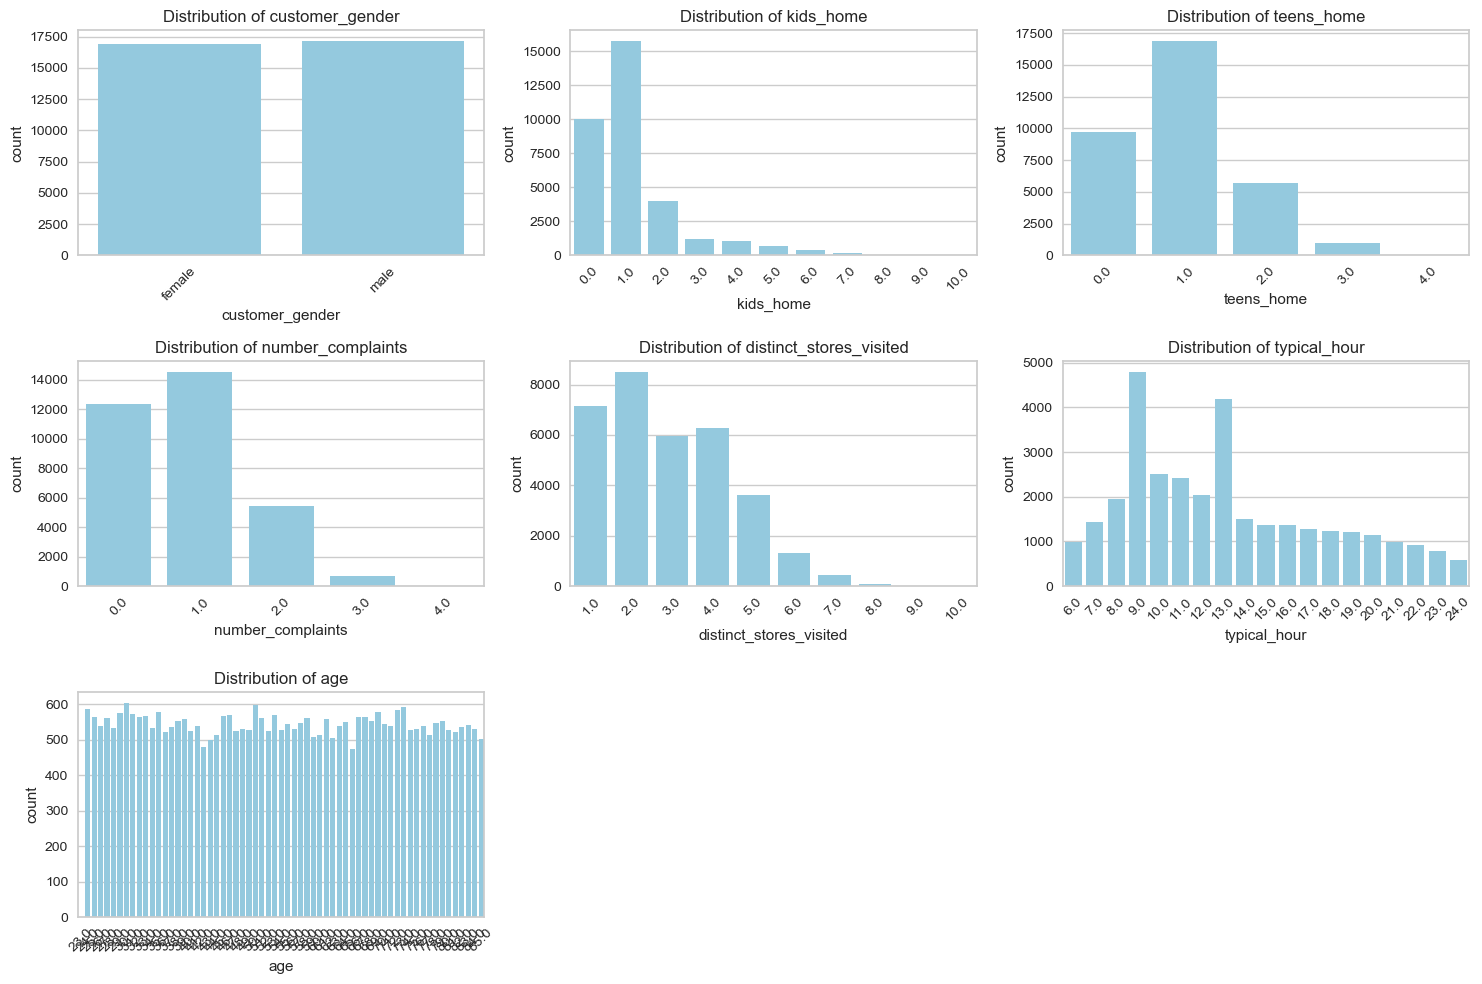

In [35]:
# Define the columns to plot
columns = ['customer_gender', 'kids_home', 'teens_home', 
            'number_complaints', 'distinct_stores_visited', 'typical_hour', 'age']

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(columns):
    sns.countplot(data=info, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

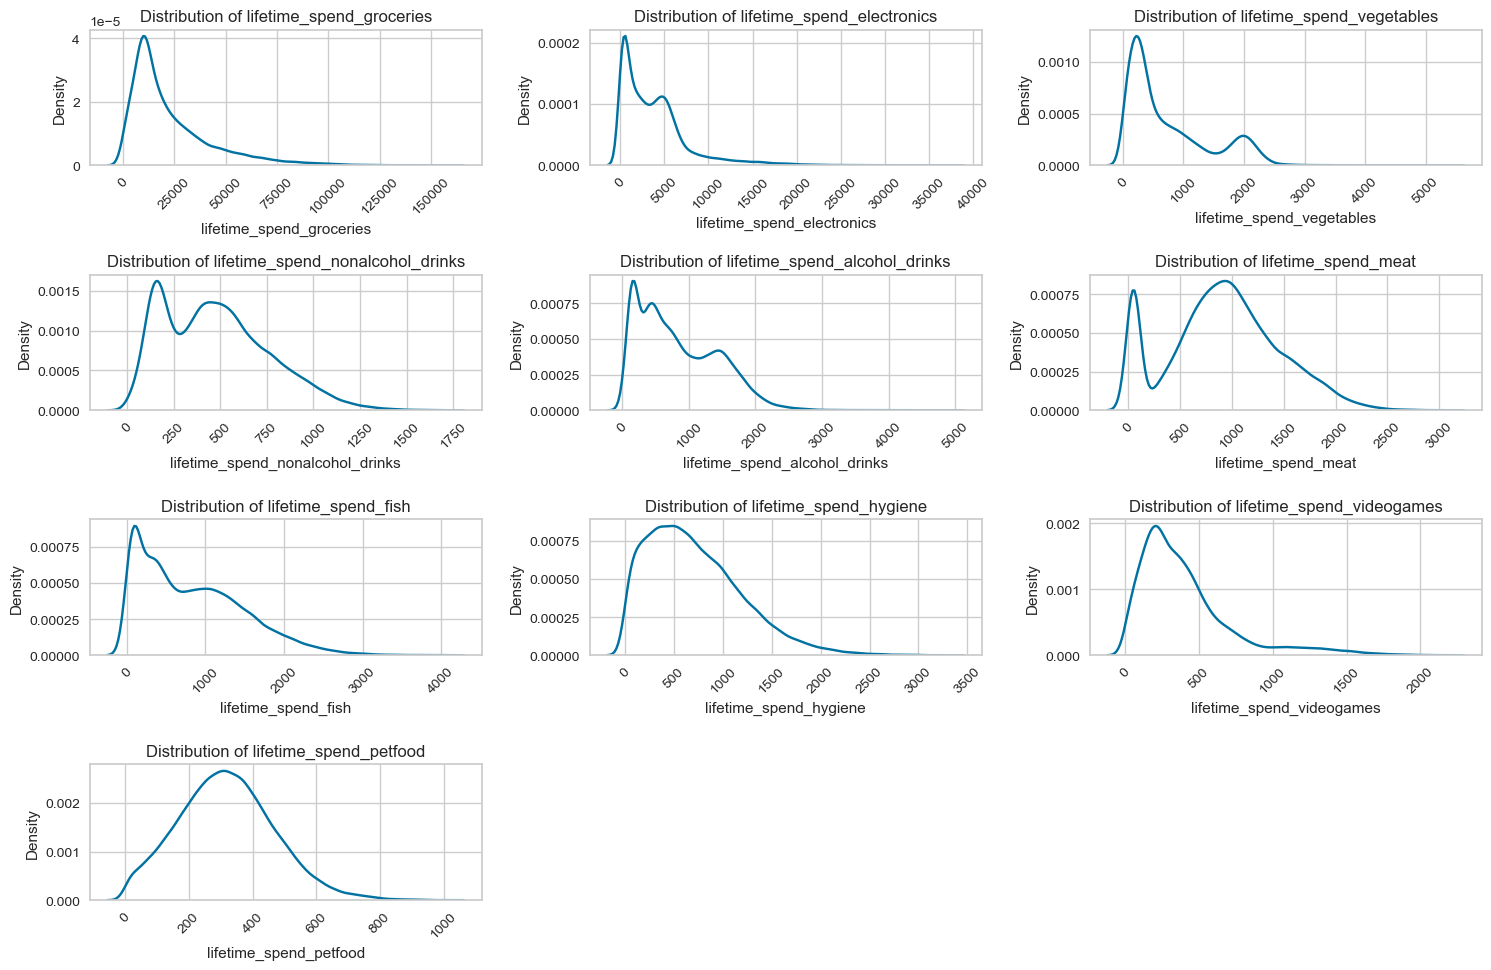

In [36]:
# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(spend_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(spend_columns):
    sns.kdeplot(data=info, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(spend_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

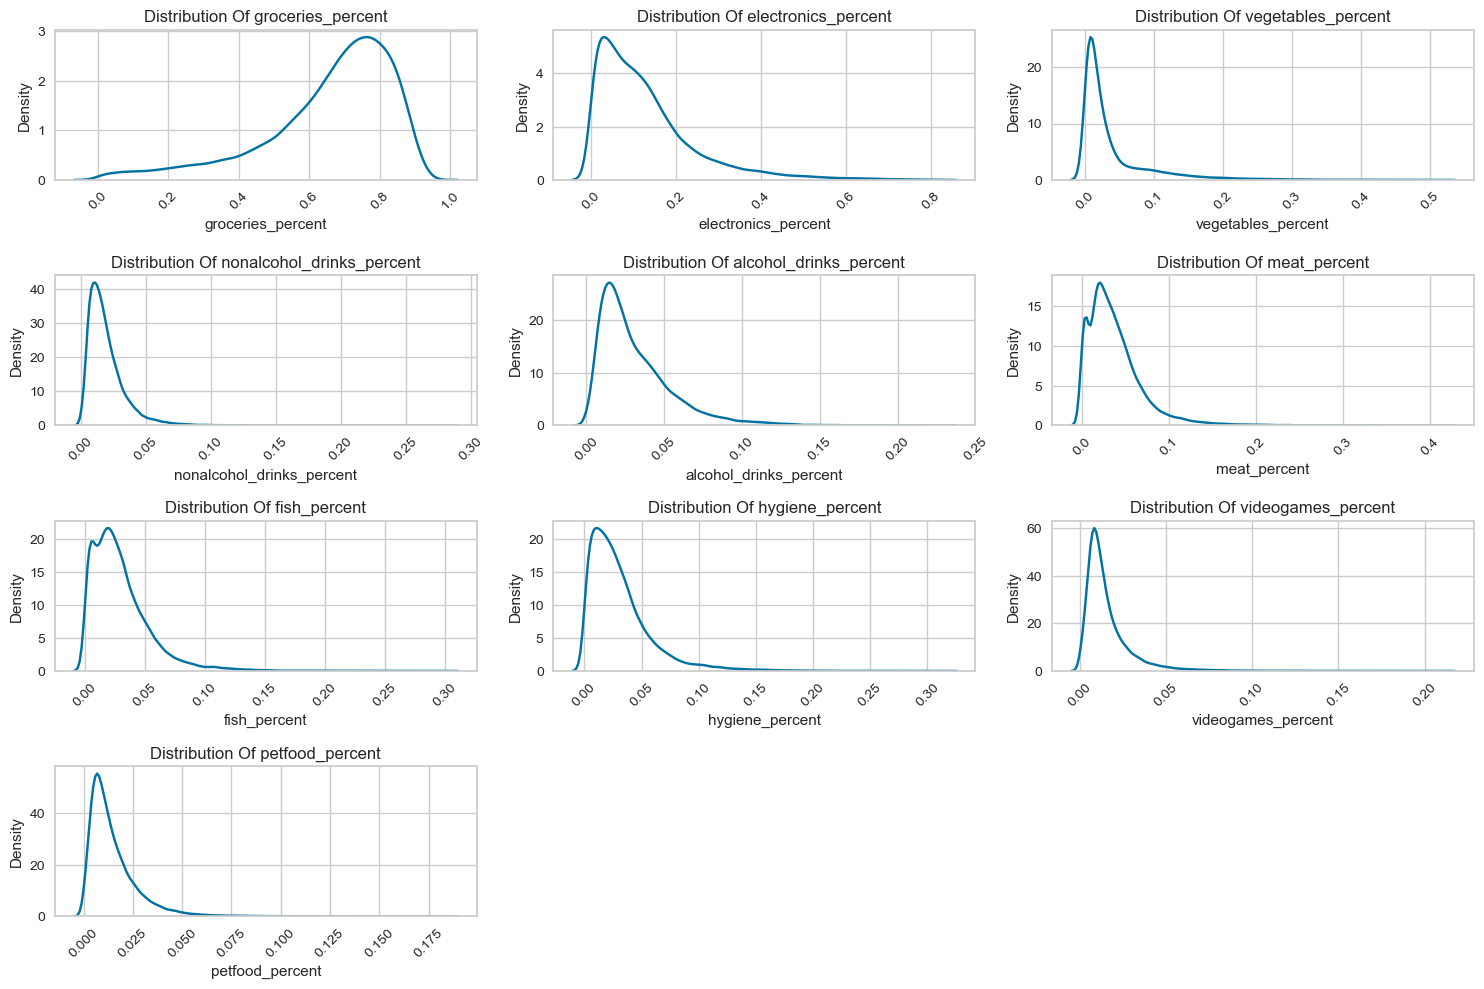

In [37]:
# Define the columns to plot
columns = [col for col in info.columns if '_percent' in col]

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(columns):
    sns.kdeplot(data=info, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution Of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
basket['list_of_goods'] = basket['list_of_goods'].apply(lambda x: x.split(','))
basket['n_items'] = basket['list_of_goods'].apply(len)

In [39]:
basket.head()

,invoice_id,list_of_goods,customer_id,n_items
0,5062209,"[['megaman zero 3', 'energy bar', 'pokemon v...",4925,13
1,4272512,"[['black beer', 'bramble', 'laptop', 'pokem...",19046,12
2,7121052,"[['soup', 'shallot', 'cake', 'fresh bread',...",10318,13
3,5847748,"[['soup', 'cooking oil', 'cereals', 'oil', ...",27283,13
4,6336114,"[['eggplant', 'mint green tea', 'oil', 'bac...",16072,14
